## Library

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('anemia.csv')
df.sample()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
745,0,14.9,24.4,30.1,94.7,0


In [11]:
df.drop('Gender', axis=1, inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hemoglobin,1421.0,13.412738,1.974546,6.6,11.7,13.2,15.0,16.9
MCH,1421.0,22.905630,3.969375,16.0,19.4,22.7,26.2,30.0
MCHC,1421.0,30.251232,1.400898,27.8,29.0,30.4,31.4,32.5
MCV,1421.0,85.523786,9.636701,69.4,77.3,85.3,94.2,101.6
Result,1421.0,0.436312,0.496102,0.0,0.0,0.0,1.0,1.0


In [13]:
df.sample()

,Hemoglobin,MCH,MCHC,MCV,Result
396,15.7,17.7,28.3,76.8,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hemoglobin  1421 non-null   float64
 1   MCH         1421 non-null   float64
 2   MCHC        1421 non-null   float64
 3   MCV         1421 non-null   float64
 4   Result      1421 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 55.6 KB


In [18]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [20]:
numerical

['Hemoglobin', 'MCH', 'MCHC', 'MCV']

In [21]:
catgcols

['Result']

In [23]:
df['Result'].value_counts()

0    801
1    620
Name: Result, dtype: int64

In [24]:
ind_col = [col for col in df.columns if col != 'Result']
dep_col = 'Result'

In [25]:
df[dep_col].value_counts()

0    801
1    620
Name: Result, dtype: int64

## Transformasi Data

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [27]:
df['Result'] = le.fit_transform(df['Result'])

In [28]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [30]:
df.head()

,Hemoglobin,MCH,MCHC,MCV,Result
0,14.9,22.7,29.1,83.7,0
1,15.9,25.4,28.3,72.0,0
2,9.0,21.5,29.6,71.2,1
3,14.9,16.0,31.4,87.5,0
4,14.7,22.0,28.2,99.5,0


In [31]:
df.to_csv('anemia1.csv')

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

## Model Decision Tree

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(
    f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testting = {dtc_acc} \n")

print(
    f"confusion matrix : \n {confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(
    f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.9172535211267606
akurasi data testting = 0.9052631578947369 

confusion matrix : 
 [[151  19]
 [  8 107]]

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       170
           1       0.85      0.93      0.89       115

    accuracy                           0.91       285
   macro avg       0.90      0.91      0.90       285
weighted avg       0.91      0.91      0.91       285



In [36]:
input_data = (14.9, 22.7, 29.1, 83.7)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('Pasien tidak mengidap Anemia')
else:
    print('Pasien mengidap Anemia')


[0]
Pasien tidak mengidap Anemia


c:\Users\muham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


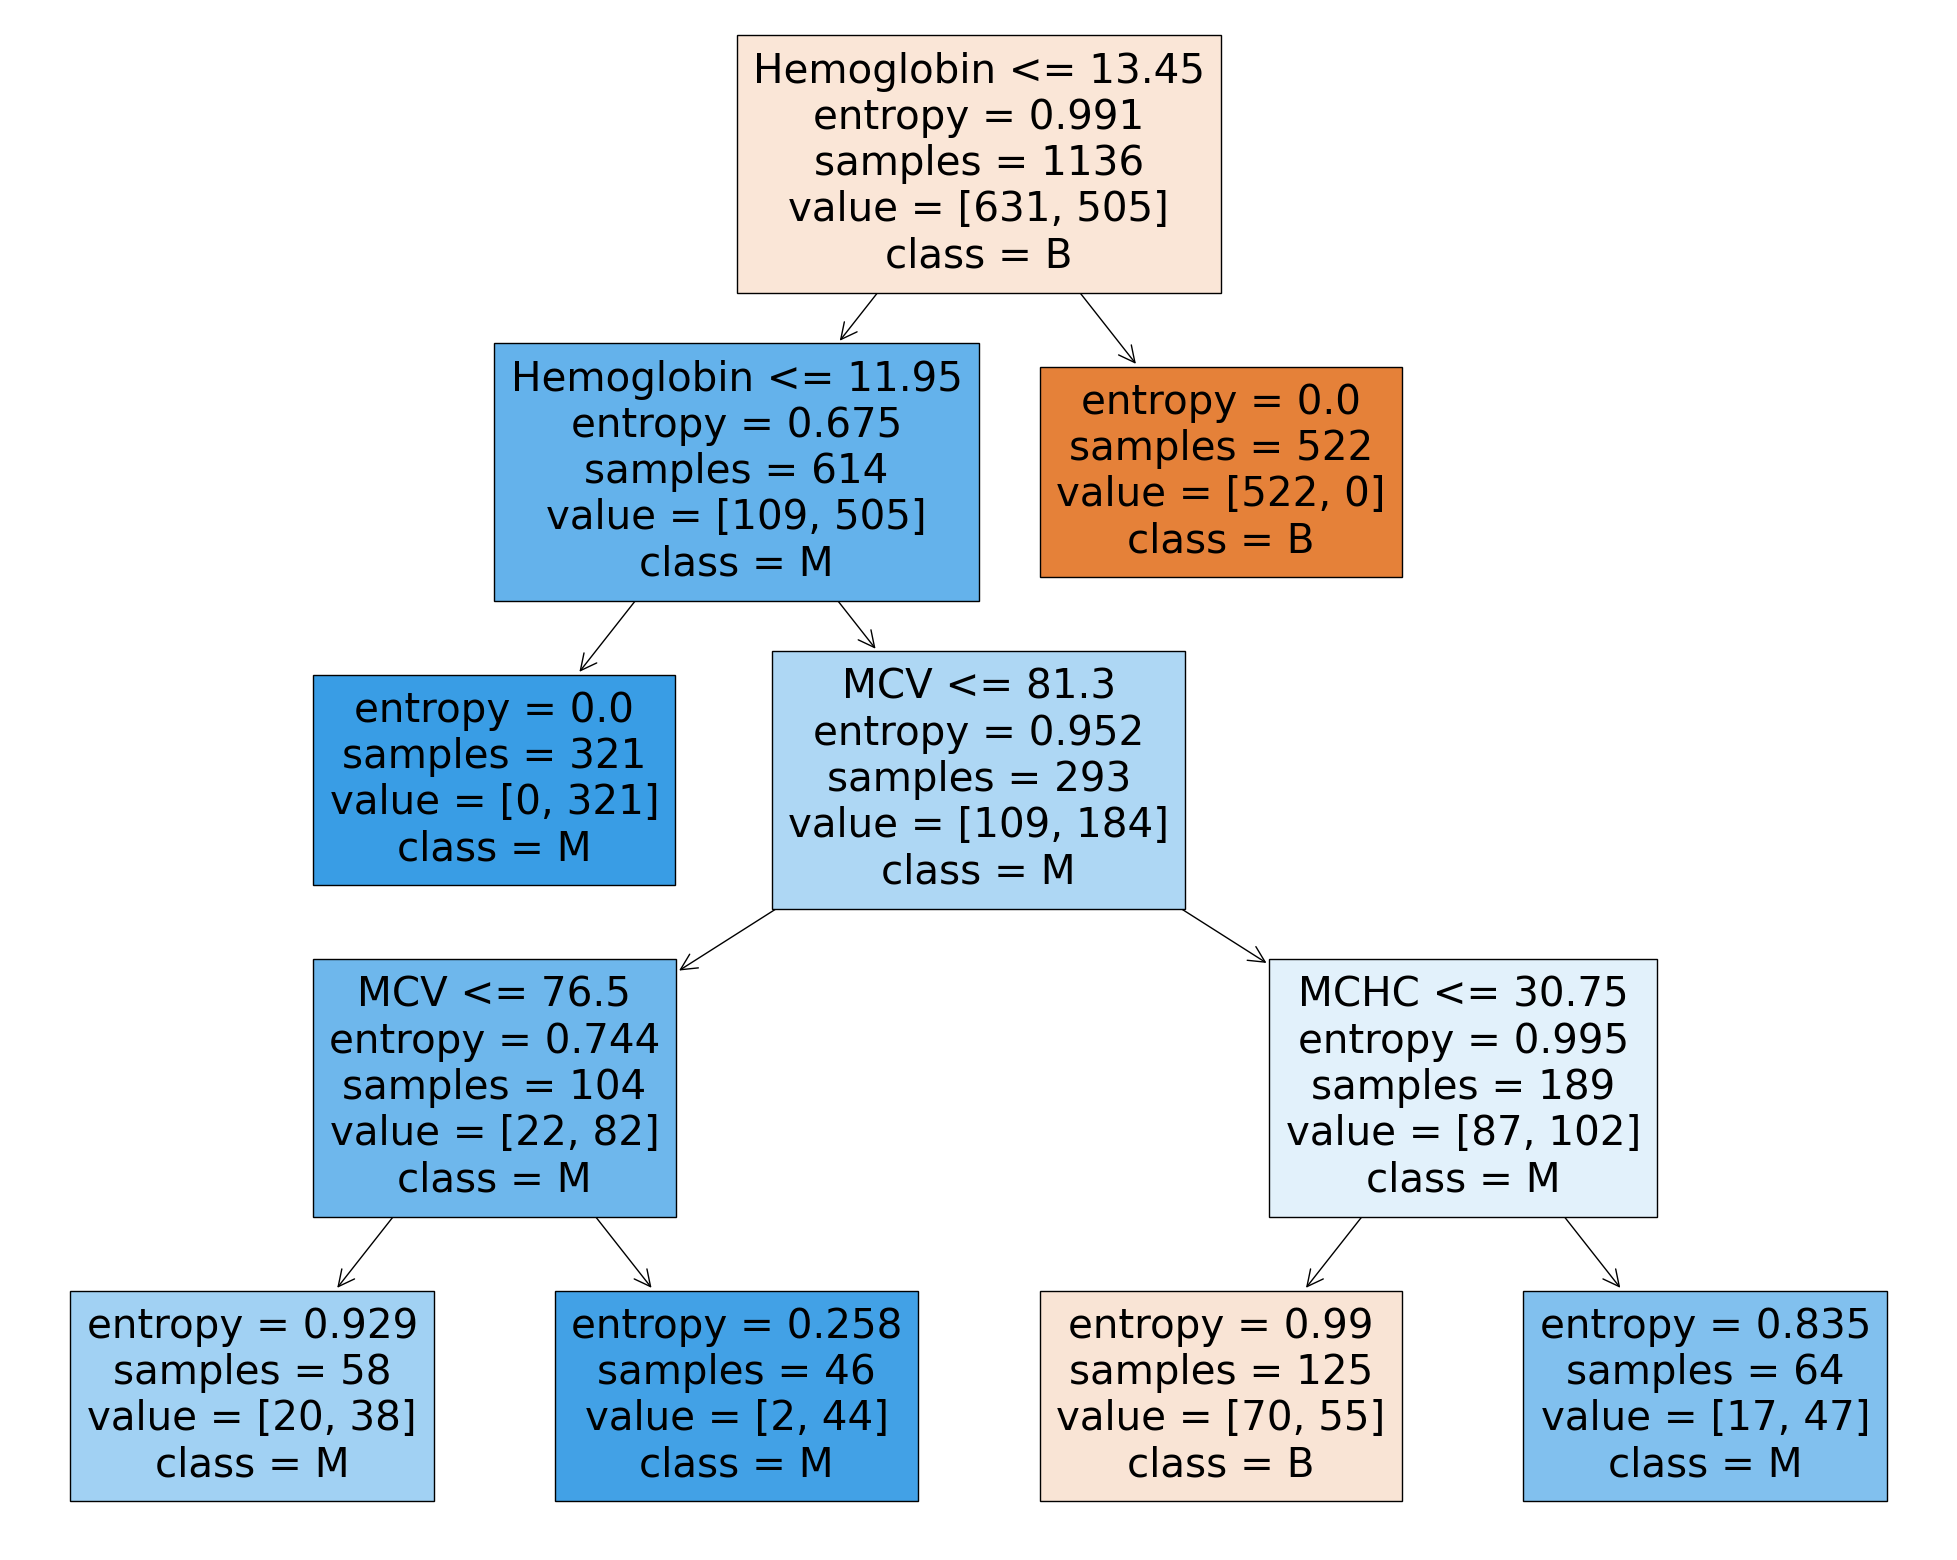

In [37]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['B', 'M'],
                   filled=True
                   )

plt.savefig('tree.png')

## Simpan Model

In [ ]:
import pickle 

filename = 'penyakit_anemia.sav'
pickle.dump(model, open(filename,'wb'))